In [1]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
import tensorflow
print(tensorflow.__version__)

2.6.0-dev20210606


In [3]:
import cv2,os
data_path='C:/Users/BHARGAVI BODDAPU/Desktop/Deepa/plant disese/plant/input'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'diseased': 0, 'healthy': 1}
['diseased', 'healthy']
[0, 1]


In [4]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [5]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [6]:
new_target.shape

(252, 2)

In [7]:
data.shape

(252, 100, 100, 3)

In [8]:
data.shape[1:]

(100, 100, 3)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model1=Sequential()

model1.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model1.add(Conv2D(100,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model1.add(Flatten())
model1.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model1.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model1.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

In [11]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [12]:
train_data.shape

(226, 100, 100, 3)

In [13]:
train_target.shape

(226, 2)

In [14]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model1.fit(train_data,train_target,epochs=20,validation_split=0.2)

Epoch 1/20
6/6 [==============================] - 17s 3s/step - loss: 1.2714 - accuracy: 0.5500 - val_loss: 0.6931 - val_accuracy: 0.5435
Epoch 2/20
6/6 [==============================] - 13s 2s/step - loss: 0.6703 - accuracy: 0.6222 - val_loss: 0.7268 - val_accuracy: 0.5435
Epoch 3/20
6/6 [==============================] - 13s 2s/step - loss: 0.6856 - accuracy: 0.6389 - val_loss: 0.6868 - val_accuracy: 0.4783
Epoch 4/20
6/6 [==============================] - 12s 2s/step - loss: 0.6836 - accuracy: 0.5222 - val_loss: 0.6845 - val_accuracy: 0.5435
Epoch 5/20
6/6 [==============================] - 13s 2s/step - loss: 0.6440 - accuracy: 0.6278 - val_loss: 0.6778 - val_accuracy: 0.5435
Epoch 6/20
6/6 [==============================] - 13s 2s/step - loss: 0.6184 - accuracy: 0.6611 - val_loss: 0.6443 - val_accuracy: 0.6087
Epoch 7/20
6/6 [==============================] - 13s 2s/step - loss: 0.5814 - accuracy: 0.6889 - val_loss: 0.6138 - val_accuracy: 0.7826
Epoch 8/20
6/6 [==================

In [15]:
model1.save('model1.h5')

In [16]:
from matplotlib import pyplot as plt

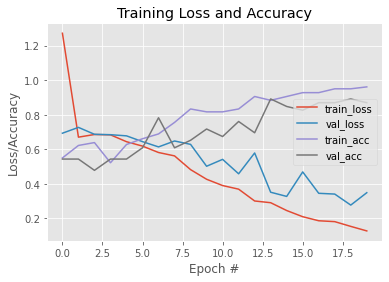

In [17]:
# plot the training loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")